In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [50]:
# Here define the path to results relative to this file's location

#Results_Path='Results/Opt_Adam/Act_tanh/LR_0_02/'
#Plot_title="Opt=Adam, Act=tanh, Replicas=1000, Learning Rate=0.02"
#Output_fileName="Test_result_Opt_Adam_Act_tanh_Rep_1000_LR_002"

Results_Path='Results/Opt_Adam/Act_tanh/LR_0_02/64nodes/'
Out_param_Opt="Adam"
Out_param_Act="tanh"
Out_param_LR="0-02_64nodes"
Out_param_Rep="1000"


#Results_Path='Results/Opt_Adamax/Act_selu/LR_0_02/'
#Out_param_Opt="Adamax"
#Out_param_Act="selu"
#Out_param_LR="0-02"
#Out_param_Rep="1000"



Plot_title="Opt="+Out_param_Opt+", Act="+Out_param_Act+", Replicas="+Out_param_Rep+", Learning Rate="+Out_param_LR
Output_fileName="Test_result_Opt_"+Out_param_Opt+"_Act_"+Out_param_Act+"_Rep_"+Out_param_Rep+"_LR_"+Out_param_LR


#testpd=pd.read_csv(Results_Path+'Results'+str(0)+'.csv')
#print(testpd)

def MeanVarFile(fileNum,CFFname):
    Tempdf=pd.read_csv(Results_Path+'Results'+str(fileNum)+'.csv')
    Temp_mean=Tempdf[CFFname].mean()
    Temp_sigma=np.sqrt(Tempdf[CFFname].var())
    print('Data set '+str(fileNum)+' : '+ str(CFFname)+' Mean is = '+str(Temp_mean)+', and  '+str(CFFname)+' Std. dev. is = '+str(Temp_sigma))
    return Temp_mean,Temp_sigma


def DataSetVals(fileName,CFFname,SetNum):
    TempdfData=pd.read_csv(fileName)
    TempdfDataSliced=TempdfData[TempdfData["#Set"]==SetNum]
    TempData_mean=TempdfDataSliced[CFFname].mean()
    TempData_sigma=np.sqrt(TempdfDataSliced[CFFname].var())
    return TempData_mean,TempData_sigma

def PlotCFF(CFFname,NumFiles,clr):
    TempNfiles=list(range(0,NumFiles))
    Temp_mean_array=[MeanVarFile(i,CFFname)[0] for i in TempNfiles]
    Temp_sigma_array=[MeanVarFile(i,CFFname)[1] for i in TempNfiles]
    Temp_Data_array=[DataSetVals('dvcs_psuedo.csv',CFFname,i)[0] for i in TempNfiles]
    plt.errorbar(TempNfiles,Temp_mean_array,Temp_sigma_array,fmt='o',color=clr,label="Estimated")
    plt.plot(TempNfiles,Temp_Data_array,'o',color='red',label="Data (Actual)")
    plt.ylabel(CFFname,fontsize=25)
    plt.xlabel("Data-set",fontsize=25)
    plt.title(str(Plot_title),fontsize=25)
    plt.xticks(fontsize=25)
    plt.yticks(fontsize=25)
    if (CFFname=='ReE'):
        plt.ylim(-120,-10)
    if (CFFname=='ReH'):
        plt.ylim(0,25)
    if (CFFname=='ReHtilde'):
        plt.ylim(2,12)            
    plt.legend(loc=1,fontsize=20,handlelength=3)

                

##### The following section produces the plot for F-values

from BHDVCStf import BHDVCS #modified bhdvcs file
bhdvcs = BHDVCS()
dfData=pd.read_csv('dvcs_psuedo.csv')
x = np.array(dfData.loc[[18], ['phi_x', 'k', 'QQ', 'x_b', 't', 'F1', 'F2', 'dvcs']])

def F2Calculated(fileNum):
    TempFs=[]
    Tempdf=pd.read_csv(Results_Path+'Results'+str(fileNum)+'.csv')
    for i in range(1000):
        TempFs.append(bhdvcs.TotalUUXS(x, Tempdf.loc[i, 'ReH'], Tempdf.loc[i, 'ReE'], Tempdf.loc[i, 'ReHtilde']).numpy()[0])
    TempFS=np.array(TempFs)    
    Temp_mean=TempFS.mean()
    Temp_sigma=TempFS.std()
    print('Data set '+str(fileNum)+': F2 Mean is = '+str(Temp_mean)+', and F2 Std. dev. is = '+str(Temp_sigma))
    return Temp_mean,Temp_sigma


def PlotFs(NumFiles,clr):
    TempNfiles=list(range(0,NumFiles))
    TempNfilesShifted=np.array(TempNfiles)+0.1
    Temp_mean_and_sigma=[F2Calculated(i) for i in TempNfiles]
    Temp_mean_array=[Temp_mean_and_sigma[i][0] for i in range(0,len(Temp_mean_and_sigma))]
    Temp_sigma_array=[Temp_mean_and_sigma[i][1] for i in range(0,len(Temp_mean_and_sigma))]
    Temp_Data_array=[DataSetVals('dvcs_psuedo.csv',"F",i)[0] for i in TempNfiles]
    Temp_Data_error_array=[DataSetVals('dvcs_psuedo.csv',"F",i)[1] for i in TempNfiles]
    plt.errorbar(TempNfiles,Temp_mean_array,Temp_sigma_array,fmt='o',color=clr,label="Estimated")
    plt.errorbar(TempNfilesShifted,Temp_Data_array,Temp_Data_error_array,fmt='o',color='red',label="Data (Actual)")
    plt.ylabel("F",fontsize=25)
    plt.xlabel("Data-set",fontsize=25)
    plt.title(str(Plot_title),fontsize=25)
    plt.xticks(fontsize=25)
    plt.yticks(fontsize=25)
    plt.ylim(0,0.16) 
    plt.legend(loc=1,fontsize=20,handlelength=3)  
    
    
    
    
def ValuesFileGenerator(NumFiles):
    TempNfiles=list(range(0,NumFiles))
    TempfilesArray=np.array(TempNfiles)
    #### For ReE ####
    TempCFF='ReE'
    Temp_mean_array_ReE=[MeanVarFile(i,TempCFF)[0] for i in TempNfiles]
    Temp_sigma_array_ReE=[MeanVarFile(i,TempCFF)[1] for i in TempNfiles]
    Temp_Data_array_ReE=[DataSetVals('dvcs_psuedo.csv',TempCFF,i)[0] for i in TempNfiles]
    Temp_Data_sigma_array_ReE=[DataSetVals('dvcs_psuedo.csv',TempCFF,i)[1] for i in TempNfiles]
    #### For ReH ####
    TempCFF='ReH'
    Temp_mean_array_ReH=[MeanVarFile(i,TempCFF)[0] for i in TempNfiles]
    Temp_sigma_array_ReH=[MeanVarFile(i,TempCFF)[1] for i in TempNfiles]
    Temp_Data_array_ReH=[DataSetVals('dvcs_psuedo.csv',TempCFF,i)[0] for i in TempNfiles]
    Temp_Data_sigma_array_ReH=[DataSetVals('dvcs_psuedo.csv',TempCFF,i)[1] for i in TempNfiles]
    #### For ReHtilde ####
    TempCFF='ReHtilde'
    Temp_mean_array_ReHtilde=[MeanVarFile(i,TempCFF)[0] for i in TempNfiles]
    Temp_sigma_array_ReHtilde=[MeanVarFile(i,TempCFF)[1] for i in TempNfiles]
    Temp_Data_array_ReHtilde=[DataSetVals('dvcs_psuedo.csv',TempCFF,i)[0] for i in TempNfiles]
    Temp_Data_sigma_array_ReHtilde=[DataSetVals('dvcs_psuedo.csv',TempCFF,i)[1] for i in TempNfiles]
    #### F2 Values ####
    Temp_mean_and_sigma_F2=[F2Calculated(i) for i in TempNfiles]
    Temp_mean_array_F2=[Temp_mean_and_sigma_F2[i][0] for i in range(0,len(Temp_mean_and_sigma_F2))]
    Temp_sigma_array_F2=[Temp_mean_and_sigma_F2[i][1] for i in range(0,len(Temp_mean_and_sigma_F2))]
    Temp_Data_array_F2=[DataSetVals('dvcs_psuedo.csv',"F",i)[0] for i in TempNfiles]
    Temp_Data_sigma_array_F2=[DataSetVals('dvcs_psuedo.csv',"F",i)[1] for i in TempNfiles]
    TempDataArray=np.array([TempfilesArray,Temp_Data_array_ReE,Temp_Data_sigma_array_ReE,Temp_mean_array_ReE,Temp_sigma_array_ReE,Temp_Data_array_ReH,Temp_Data_sigma_array_ReH,Temp_mean_array_ReH,Temp_sigma_array_ReH,Temp_Data_array_ReHtilde,Temp_Data_sigma_array_ReHtilde,Temp_mean_array_ReHtilde,Temp_sigma_array_ReHtilde,Temp_Data_array_F2,Temp_Data_sigma_array_F2,Temp_mean_array_F2,Temp_sigma_array_F2])
    with open(Output_fileName+'.txt','w') as output:
        output.write("This is the summary file for "+Output_fileName+"\n")
        output.write("Set "+"         ReE (data) "+"             dReE (data) "+"              ReE "+"                  dReE "+"                 ReH (data) "+"              dReH  (data) "+"            ReH "+"                    dReH "+"                ReHtilde (data) "+"          dReHtilde (data) "+"         ReHtilde "+"             dReHtilde "+"              F2 (data) "+"                dF2 (data) "+"               F2 "+"                     dF2 "+"\n")
        for i in zip(*TempDataArray):
            output.write("{0} \t{1}\t{2}\t{3}\t{4}\t{5}\t{6}\t{7}\t{8}\t{9}\t{10}\t{11}\t{12}\t{13}\t{14}\t{15}\t{16}\n".format(*i))

    

Data set 0 : ReE Mean is = -57.116974334716794, and  ReE Std. dev. is = 4.244450899001283
Data set 1 : ReE Mean is = -38.521805701494216, and  ReE Std. dev. is = 8.698035955206407
Data set 2 : ReE Mean is = -42.05364996135235, and  ReE Std. dev. is = 12.530213747854361
Data set 3 : ReE Mean is = -89.19347738075257, and  ReE Std. dev. is = 14.29194511562896
Data set 4 : ReE Mean is = -49.5712357673645, and  ReE Std. dev. is = 4.502224727142433
Data set 5 : ReE Mean is = -44.14074215555191, and  ReE Std. dev. is = 9.698044711645469
Data set 6 : ReE Mean is = -39.282849120616916, and  ReE Std. dev. is = 11.041923882900706
Data set 7 : ReE Mean is = -81.09695747661591, and  ReE Std. dev. is = 12.053765388538917
Data set 8 : ReE Mean is = -50.96629109954834, and  ReE Std. dev. is = 3.5594286411652893
Data set 9 : ReE Mean is = -53.43386550140381, and  ReE Std. dev. is = 7.153908576315382
Data set 10 : ReE Mean is = -45.11996596527099, and  ReE Std. dev. is = 8.247334949510723
Data set 11 : 

Data set 0: F2 Mean is = 0.05323146755841742, and F2 Std. dev. is = 0.0019076783903716273
Data set 1: F2 Mean is = 0.051759134578472636, and F2 Std. dev. is = 0.0033973775019838074
Data set 2: F2 Mean is = 0.024417212442772944, and F2 Std. dev. is = 0.0036352272558497238
Data set 3: F2 Mean is = 0.03319014959220492, and F2 Std. dev. is = 0.004234440809906145
Data set 4: F2 Mean is = 0.05138144785604187, and F2 Std. dev. is = 0.002166090198674077
Data set 5: F2 Mean is = 0.023832360319108892, and F2 Std. dev. is = 0.0028857951056323874
Data set 6: F2 Mean is = 0.0481246583131848, and F2 Std. dev. is = 0.004167455389697591
Data set 7: F2 Mean is = 0.034536355669860665, and F2 Std. dev. is = 0.004502178633849779
Data set 8: F2 Mean is = 0.05127013105922779, and F2 Std. dev. is = 0.002262218219797459
Data set 9: F2 Mean is = 0.021618142554988423, and F2 Std. dev. is = 0.002686867963293214
Data set 10: F2 Mean is = 0.023981168294123265, and F2 Std. dev. is = 0.0028219342561570035
Data set 1

Data set 0: F2 Mean is = 0.05323146755841742, and F2 Std. dev. is = 0.0019076783903716273
Data set 1: F2 Mean is = 0.051759134578472636, and F2 Std. dev. is = 0.0033973775019838074
Data set 2: F2 Mean is = 0.024417212442772944, and F2 Std. dev. is = 0.0036352272558497238
Data set 3: F2 Mean is = 0.03319014959220492, and F2 Std. dev. is = 0.004234440809906145
Data set 4: F2 Mean is = 0.05138144785604187, and F2 Std. dev. is = 0.002166090198674077
Data set 5: F2 Mean is = 0.023832360319108892, and F2 Std. dev. is = 0.0028857951056323874
Data set 6: F2 Mean is = 0.0481246583131848, and F2 Std. dev. is = 0.004167455389697591
Data set 7: F2 Mean is = 0.034536355669860665, and F2 Std. dev. is = 0.004502178633849779
Data set 8: F2 Mean is = 0.05127013105922779, and F2 Std. dev. is = 0.002262218219797459
Data set 9: F2 Mean is = 0.021618142554988423, and F2 Std. dev. is = 0.002686867963293214
Data set 10: F2 Mean is = 0.023981168294123265, and F2 Std. dev. is = 0.0028219342561570035
Data set 1

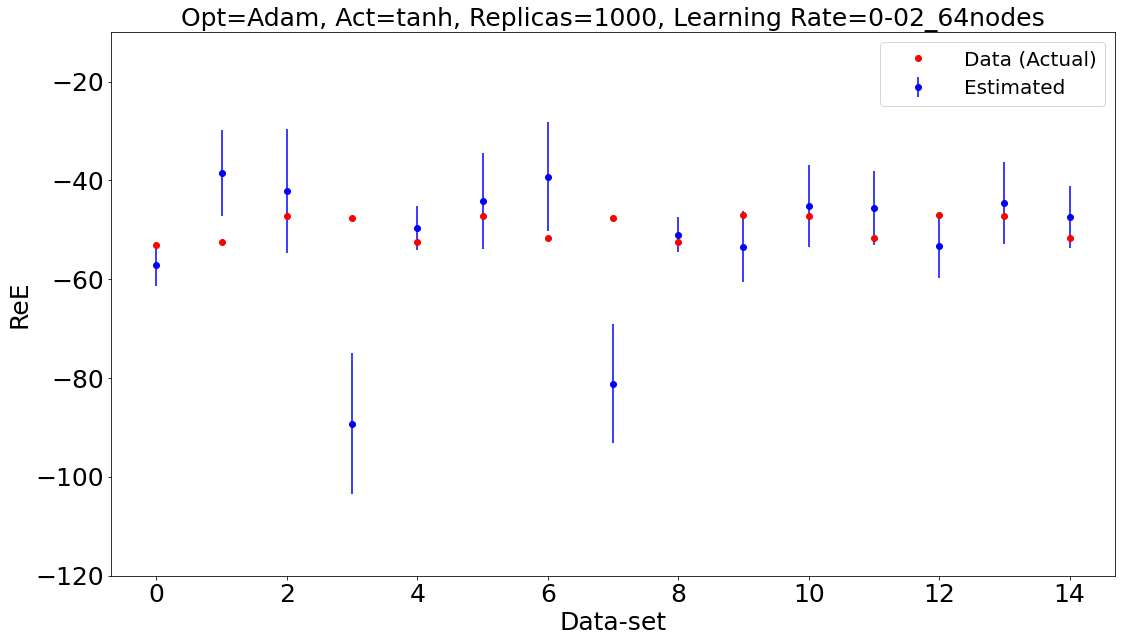

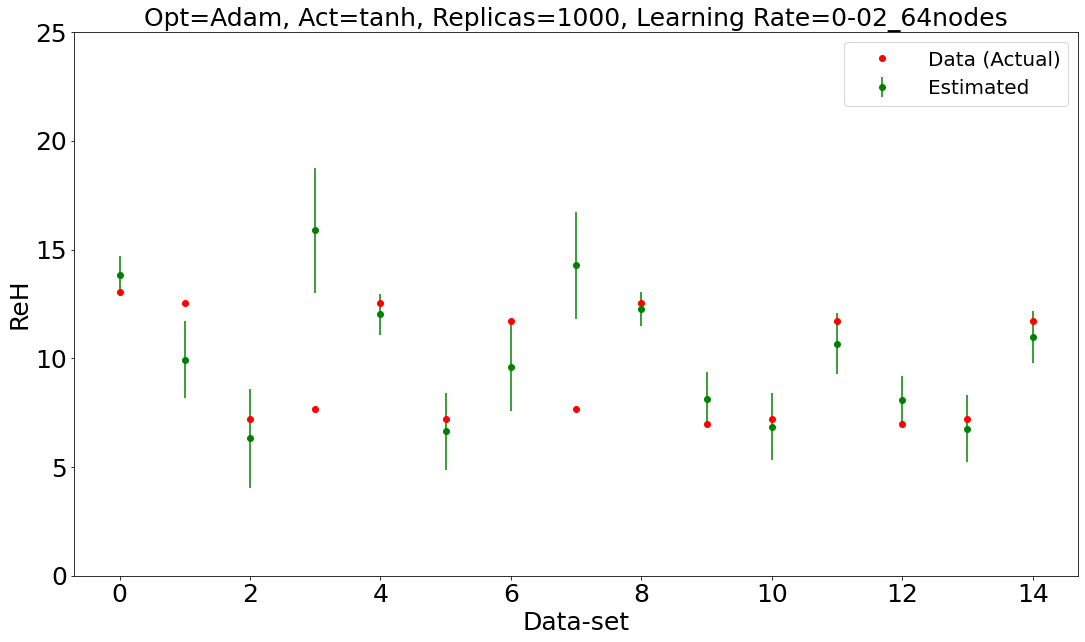

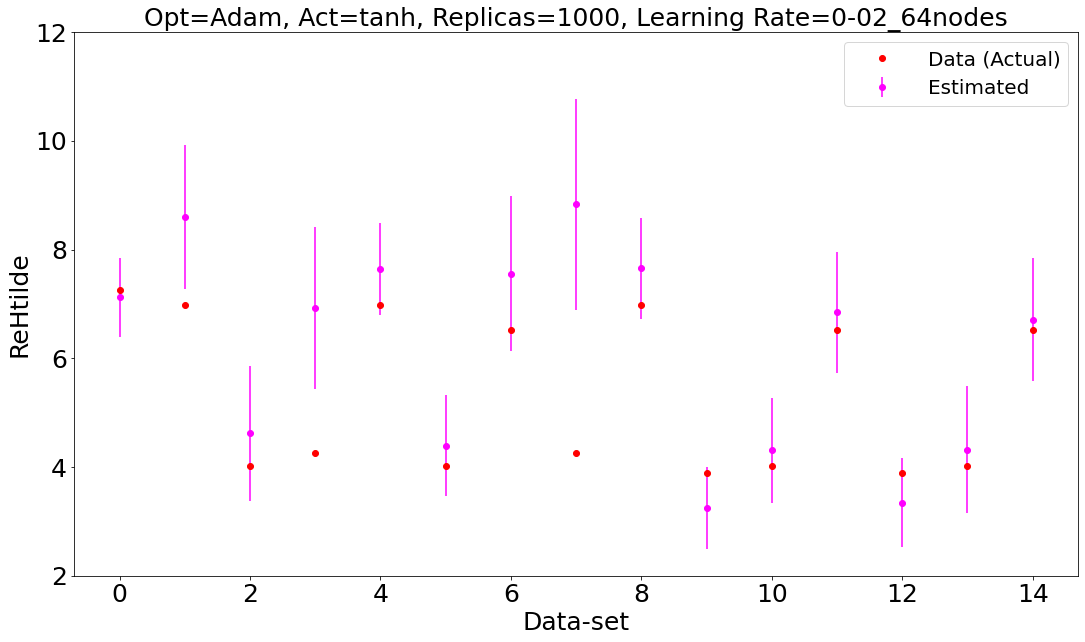

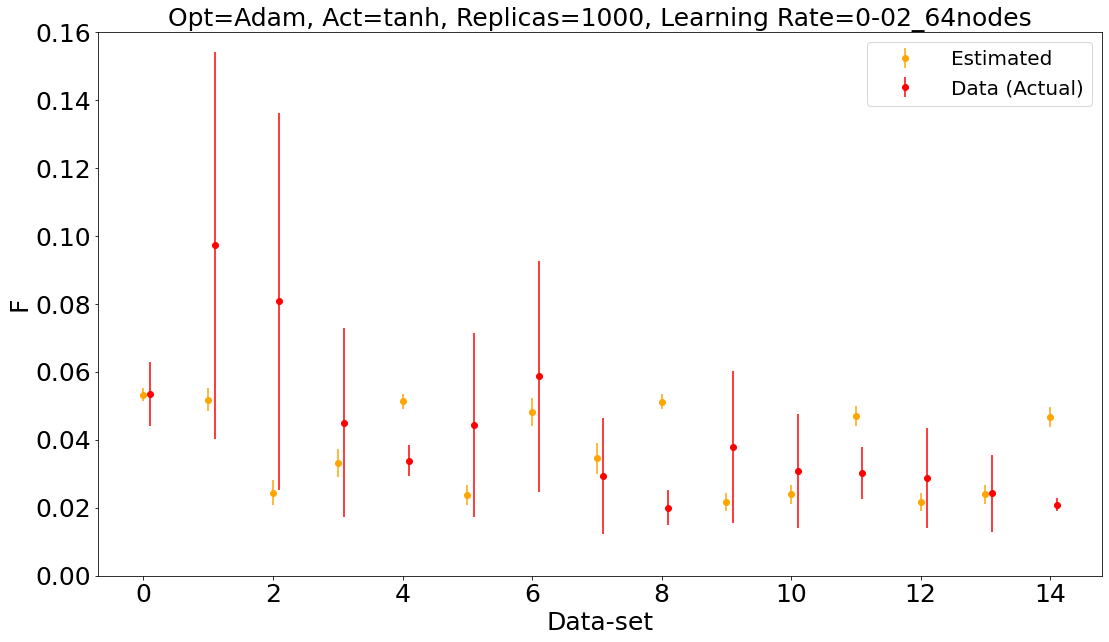

In [51]:
ValuesFileGenerator(15)

f1=plt.figure(1,figsize=(18,10))    
PlotCFF("ReE",15,'blue')

f2=plt.figure(2,figsize=(18,10))
plotReH=PlotCFF("ReH",15,'green')

f3=plt.figure(3,figsize=(18,10))
plotReHtilde=PlotCFF("ReHtilde",15,'magenta')

f4=plt.figure(4,figsize=(18,10))
plotFs=PlotFs(15,'orange')


import matplotlib.backends.backend_pdf
pdf = matplotlib.backends.backend_pdf.PdfPages(Output_fileName+".pdf")
for fig in range(1,5):
    pdf.savefig(fig)
pdf.close()